Synthetic Transaction Dataset:
   Bread  Milk  Butter  Cheese  Eggs
0      1     1       0       0     1
1      0     1       1       1     1
2      1     0       1       1     1
3      1     1       1       0     0
4      0     1       0       1     1

Association Rules:
        antecedents consequents  antecedent support  consequent support  \
0            (Milk)      (Eggs)                 0.8                 0.8   
1            (Eggs)      (Milk)                 0.8                 0.8   
2            (Eggs)    (Cheese)                 0.8                 0.6   
3          (Cheese)      (Eggs)                 0.6                 0.8   
4    (Milk, Cheese)      (Eggs)                 0.4                 0.8   
5  (Cheese, Butter)      (Eggs)                 0.4                 0.8   
6    (Eggs, Butter)    (Cheese)                 0.4                 0.6   

   support  confidence      lift  representativity  leverage  conviction  \
0      0.6        0.75  0.937500               1.0

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


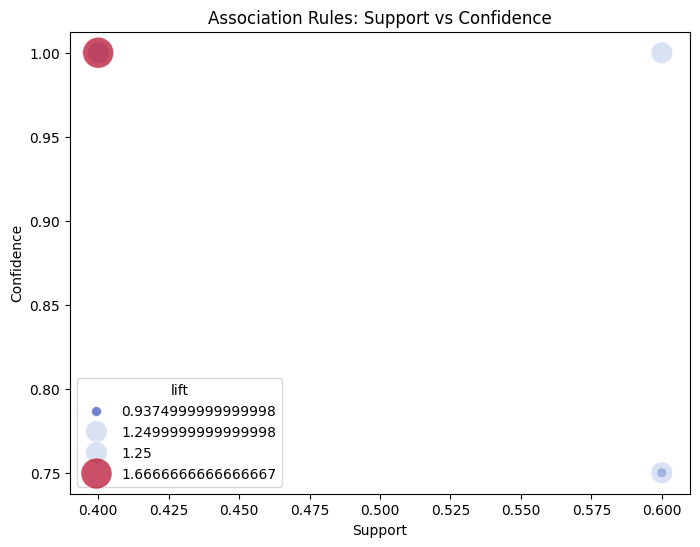

In [2]:
# Step 1: Install the necessary libraries
!pip install mlxtend

# Step 2: Import required libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np

# Step 3: Generate a simple synthetic dataset
# A transaction dataset (each row is a transaction, each column is a product)
data = {
    'Bread': [1, 0, 1, 1, 0],
    'Milk': [1, 1, 0, 1, 1],
    'Butter': [0, 1, 1, 1, 0],
    'Cheese': [0, 1, 1, 0, 1],
    'Eggs': [1, 1, 1, 0, 1]
}

# Convert the dictionary into a DataFrame (simulating customer transactions)
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("Synthetic Transaction Dataset:")
print(df)

# Step 4: Apply the Apriori algorithm to find frequent itemsets
# We set the minimum support value for frequent itemsets
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

# Step 5: Generate association rules based on the frequent itemsets
# We set the minimum confidence value for the rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the resulting association rules
print("\nAssociation Rules:")
print(rules)

# Step 6: Visualizing the rules
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the support vs confidence to visualize the rules
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rules, x="support", y="confidence", size="lift", hue="lift", palette="coolwarm", sizes=(50, 500), alpha=0.7)
plt.title("Association Rules: Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

Synthetic Transaction Dataset:
   Bread  Milk  Butter  Cheese  Eggs
0      1     1       0       0     1
1      0     1       1       1     1
2      1     0       1       1     1
3      1     1       1       0     0
4      0     1       0       1     1

Association Rules:
        antecedents consequents  antecedent support  consequent support  \
0            (Milk)      (Eggs)                 0.8                 0.8   
1            (Eggs)      (Milk)                 0.8                 0.8   
2            (Eggs)    (Cheese)                 0.8                 0.6   
3          (Cheese)      (Eggs)                 0.6                 0.8   
4    (Milk, Cheese)      (Eggs)                 0.4                 0.8   
5  (Cheese, Butter)      (Eggs)                 0.4                 0.8   
6    (Eggs, Butter)    (Cheese)                 0.4                 0.6   

   support  confidence      lift  representativity  leverage  conviction  \
0      0.6        0.75  0.937500               1.0

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


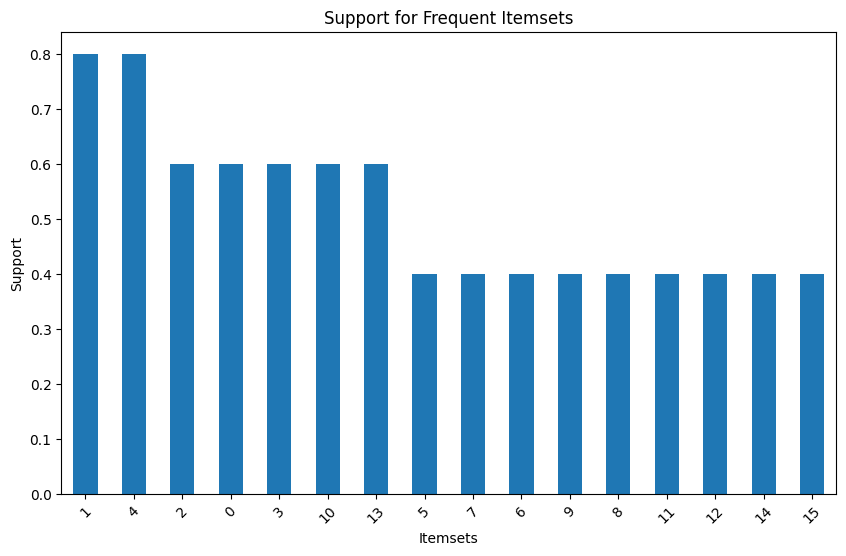

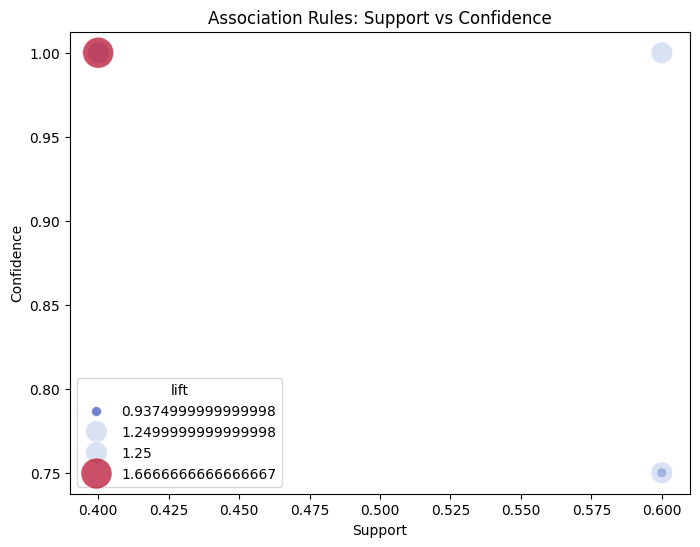

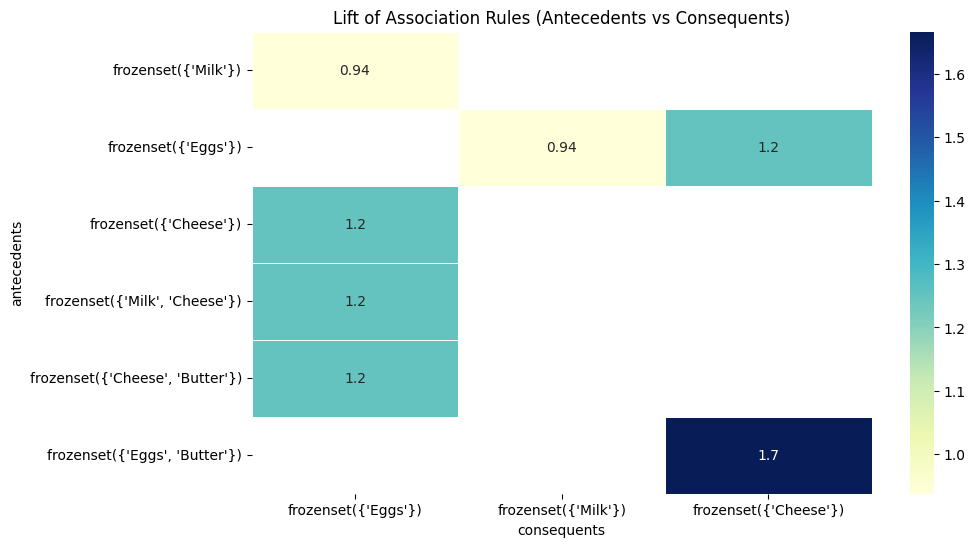

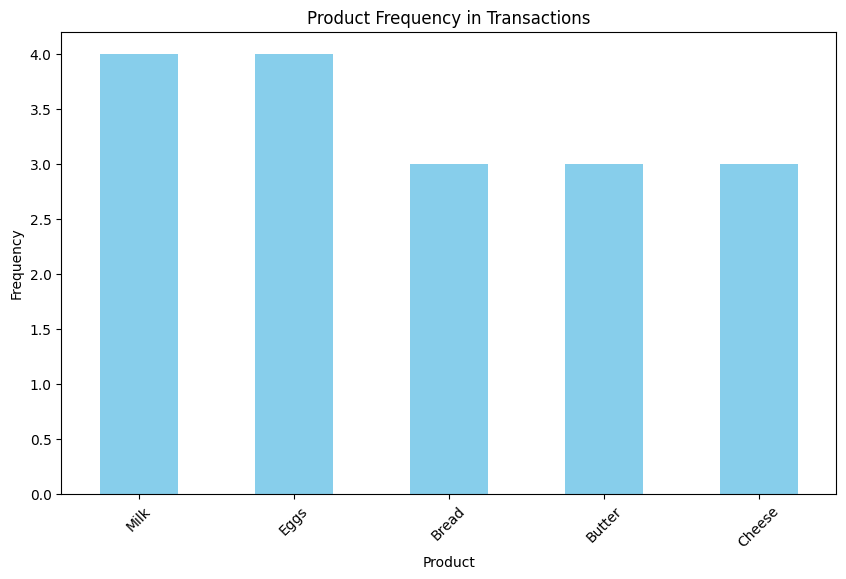

In [4]:
# Step 1: Install the necessary libraries
!pip install mlxtend
!pip install seaborn matplotlib

# Step 2: Import required libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Generate a simple synthetic dataset
# A transaction dataset (each row is a transaction, each column is a product)
data = {
    'Bread': [1, 0, 1, 1, 0],
    'Milk': [1, 1, 0, 1, 1],
    'Butter': [0, 1, 1, 1, 0],
    'Cheese': [0, 1, 1, 0, 1],
    'Eggs': [1, 1, 1, 0, 1]
}

# Convert the dictionary into a DataFrame (simulating customer transactions)
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("Synthetic Transaction Dataset:")
print(df)

# Step 4: Apply the Apriori algorithm to find frequent itemsets
# We set the minimum support value for frequent itemsets
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

# Step 5: Generate association rules based on the frequent itemsets
# We set the minimum confidence value for the rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the resulting association rules
print("\nAssociation Rules:")
print(rules)

# Step 6: Visualizing the frequent itemsets using a bar chart
plt.figure(figsize=(10, 6))
frequent_itemsets['support'].sort_values(ascending=False).plot(kind='bar')
plt.title('Support for Frequent Itemsets')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.show()

# Step 7: Visualizing the rules with support vs confidence scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rules, x="support", y="confidence", size="lift", hue="lift", palette="coolwarm", sizes=(50, 500), alpha=0.7)
plt.title("Association Rules: Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

# Step 8: Visualizing the lift of the rules in a heatmap
plt.figure(figsize=(10, 6))
rules_pivot = rules.pivot_table(index='antecedents', columns='consequents', values='lift', aggfunc='mean')
sns.heatmap(rules_pivot, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Lift of Association Rules (Antecedents vs Consequents)')
plt.show()

# Step 9: Visualizing Product Frequency (Bar Chart)
product_freq = df.sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_freq.plot(kind='bar', color='skyblue')
plt.title('Product Frequency in Transactions')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()